In [27]:
import os
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [8]:
# Load model
model = load_model('models/fer_model_best.h5')

# Class names
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
test_dir = 'dataset/test'

IMG_SIZE = 48

# Function to create test data
def create_test_data(folder_path):
    # Pre-allocate memory for the arrays
    num_images = sum([len(files) for r, d, files in os.walk(folder_path)])
    images = np.zeros((num_images, IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)  # Pre-allocate for grayscale images
    labels = np.zeros(num_images, dtype=np.int32)  # Pre-allocate

    index = 0
    for idx, class_name in enumerate(class_names):
        path = os.path.join(folder_path, class_name)
        for image_file in os.listdir(path):
            image = cv2.imread(os.path.join(path, image_file), cv2.IMREAD_GRAYSCALE)
            image_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            # Normalize the image
            image_resized = image_resized / 255.0 
            
            # Assign to pre-allocated arrays
            images[index] = np.expand_dims(image_resized, axis=-1)  # Add channel dimension
            labels[index] = idx
            index += 1

    return images, labels

In [20]:
# Load test data
X_test, y_test = create_test_data(test_dir)

# Shuffle the data
X_test, y_test = shuffle(X_test, y_test)

# Shape of the data
print(X_test.shape)
print(y_test.shape)

X_test = np.squeeze(X_test, axis=-1)
# Shape of the data
print(X_test.shape)
print(y_test.shape)

(7178, 48, 48, 1)
(7178,)
(7178, 48, 48)
(7178,)


225/225 [==============================] - 1s 6ms/step
Accuracy: 0.39063806074115354

              precision    recall  f1-score   support

       angry       0.61      0.61      0.61       958
     disgust       0.65      0.56      0.60       111
        fear       0.55      0.40      0.47      1024
       happy       0.88      0.87      0.88      1774
     neutral       0.13      0.13      0.13      1233
         sad       0.02      0.01      0.01      1247
    surprise       0.01      0.02      0.02       831

    accuracy                           0.39      7178
   macro avg       0.41      0.37      0.39      7178
weighted avg       0.42      0.39      0.40      7178



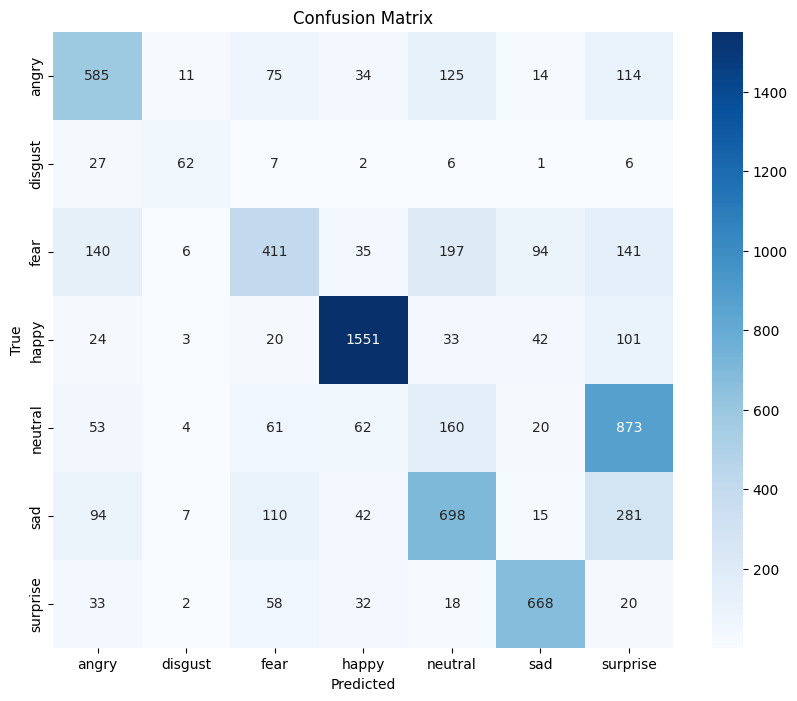

In [25]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}\n')

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Calculate precision, recall, and F1-score for the whole test set
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.4156018241808237
Recall: 0.39063806074115354
F1 Score: 0.4010410042289584
Accuracy: 0.39063806074115354
